In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

Populating the interactive namespace from numpy and matplotlib


In [3]:
def draw(base, size):
    verts = [
        (base[1], base[0]), # left, bottom
        (base[1], base[0] + size[0]), # left, top
        (base[1] + size[1], base[0] + size[0]), # right, top
        (base[1] + size[1], base[0]), # right, bottom
        (0., 0.), # ignored
        ]

    codes = [Path.MOVETO,
             Path.LINETO,
             Path.LINETO,
             Path.LINETO,
             Path.CLOSEPOLY,
             ]
    
    path = Path(verts, codes)
    
    return path

In [4]:
def check(inp, out):    
    k = int(inp[0].strip())
    m = int(inp[1].strip())
    n = int(inp[2].strip())
    rect = [list(map(int, l.strip().split(" "))) for l in inp[3:]]
    rect = {x[0]:x[1:] for x in rect}
    
    places = [list(map(int, l.strip().split(" "))) for l in out]
    
    aire = 0
    for r in rect.values():
        aire += r[0] * r[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    major_ticks = list(range(0, max(m,n), 5))
    minor_ticks = list(range(0, max(m,n), 1))
    
    ax.set_xticks(major_ticks)                                                       
    ax.set_xticks(minor_ticks, minor=True)                                           
    ax.set_yticks(major_ticks)                                                       
    ax.set_yticks(minor_ticks, minor=True)    
    
    ax.grid(which='minor', alpha=0.7)                                                
    ax.grid(which='major', alpha=1)    
    
    if aire < m*n:
        ax.add_patch(patches.PathPatch(draw([0,0],[n,m]), facecolor='lightgrey', lw=2))
    else:
        ax.add_patch(patches.PathPatch(draw([0,0],[n,m]), facecolor='blue', lw=2))
    
    for (id, h, w, swap) in places:
        if int(swap):
            base_w, base_h = rect[id]
        else:
            base_h, base_w = rect[id]
        ax.add_patch(patches.PathPatch(draw([h, w],[base_h, base_w]), facecolor='red', lw=2, alpha=0.4))
        ax.text(w + 0.2, h + 0.2, str(id), fontsize=10)
    
    ax.set_xlim(-1,m + 1)
    ax.set_ylim(-1,n + 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
    return "Surface des pièces : %i, surface du rectange: %i. Surface possible: %s" % (aire, m*n, "oui" if aire < m*n else "non")

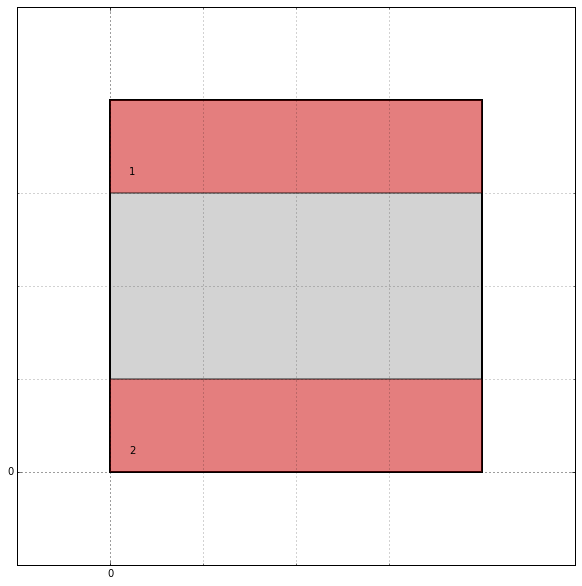

'Surface des pièces : 8, surface du rectange: 16. Surface possible: oui'

In [8]:
inp = """2
4
4
1 4 1
2 1 4""".split("\n")

out = """1 3 0 1
2 0 0 0""".split("\n")

check(inp, out)

In [6]:
def internet(i,o):
    data = requests.get("http://paste.awesom.eu/raw/" + i).text.strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")
    out = requests.get("http://paste.awesom.eu/raw/" + o).text.strip().replace("\r", "").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").replace("  ", " ").split("\n")

    return check(data, out)

ValueError: not enough values to unpack (expected 4, got 3)

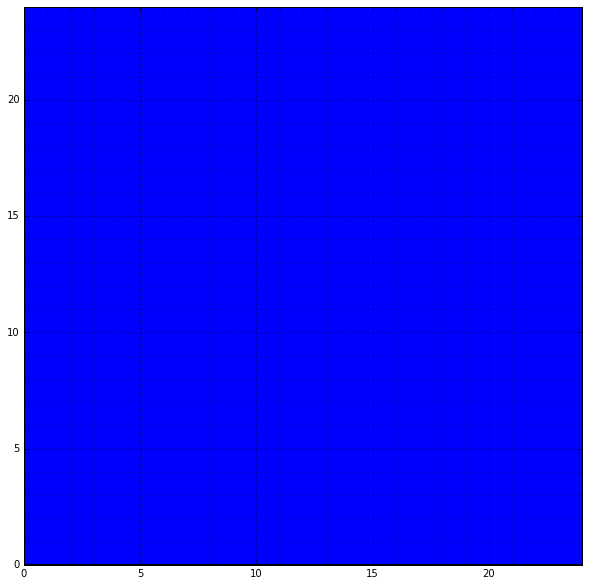

In [7]:
internet("X9bM", "ej3P")